# Week 7, Wed, 5/15


Text(0, 0.5, 'Feature 2')

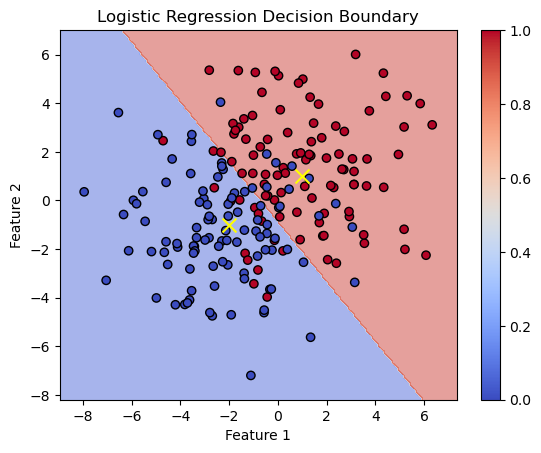

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples per class
N = 100

# Generate data: class 1 centered at (1, 1) and class 2 at (-2, -1)
std = 5
x_class1 = np.random.multivariate_normal([1, 1], std*np.eye(2), N)
x_class2 = np.random.multivariate_normal([-2, -1], std*np.eye(2), N)

# Combine into a single dataset
X = np.vstack((x_class1, x_class2))
y = np.concatenate((np.ones(N), np.zeros(N)))

# Create a logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    # response_method="predict_proba",  # Can be "predict_proba" for probability contours
    response_method="predict",
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)
# Scatter plot of the data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

# scatter plot of the mean of gaussian distributions
ax.scatter([1, -2], [1, -1], c='yellow', marker='x', s=100, label='Class Centers')

# Adding color bar
cbar = plt.colorbar(scatter, ax=ax)
# Adding title and labels
ax.set_title('Logistic Regression Decision Boundary')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')



In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
df.dropna(inplace=True)

# Use features to predict sex
features = ['bill_length_mm', 'bill_depth_mm']

# Select features
X = df[features]
y = df['sex']

# Initialize and train the logistic regression model
clf = LogisticRegression(penalty=None)
clf.fit(X, y)

# prediction
y_pred = clf.predict(X)

# Calculate the training and test accuracy
score = clf.score(X, y)
print(f"Training accuracy: {score:.2f}")



Training accuracy: 0.78


In [7]:
y

0        Male
1      Female
2      Female
4      Female
5        Male
        ...  
338    Female
340    Female
341      Male
342    Female
343      Male
Name: sex, Length: 333, dtype: object

In [9]:
clf.classes_

array(['Female', 'Male'], dtype=object)

In [10]:
y_pred[:5]

array(['Male', 'Female', 'Female', 'Female', 'Male'], dtype=object)

In [11]:
y_pred_proba = clf.predict_proba(X)

In [12]:
y_pred_proba

array([[0.49992132, 0.50007868],
       [0.70860573, 0.29139427],
       [0.55266441, 0.44733559],
       [0.54734163, 0.45265837],
       [0.18061042, 0.81938958],
       [0.67795367, 0.32204633],
       [0.32785431, 0.67214569],
       [0.57480085, 0.42519915],
       [0.14395903, 0.85604097],
       [0.34937649, 0.65062351],
       [0.79703243, 0.20296757],
       [0.46952601, 0.53047399],
       [0.0789741 , 0.9210259 ],
       [0.81815319, 0.18184681],
       [0.01765569, 0.98234431],
       [0.65902686, 0.34097314],
       [0.59367678, 0.40632322],
       [0.6185772 , 0.3814228 ],
       [0.66906797, 0.33093203],
       [0.77413579, 0.22586421],
       [0.70605864, 0.29394136],
       [0.4181914 , 0.5818086 ],
       [0.55822167, 0.44177833],
       [0.59909414, 0.40090586],
       [0.36975771, 0.63024229],
       [0.80622499, 0.19377501],
       [0.72612386, 0.27387614],
       [0.64146776, 0.35853224],
       [0.3448657 , 0.6551343 ],
       [0.88450766, 0.11549234],
       [0.

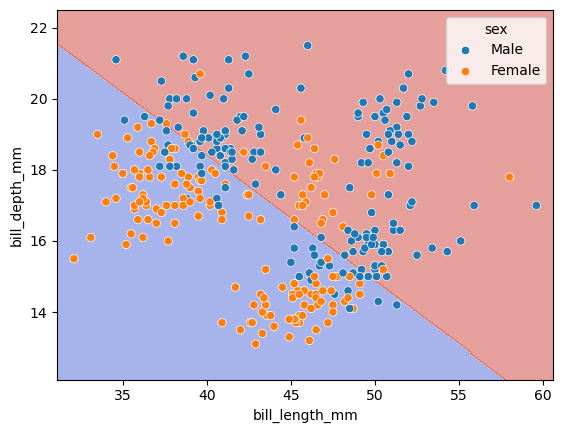

In [13]:
import seaborn as sns
# Plot the decision boundaries using DecisionBoundaryDisplay
fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)
# Scatter plot of the data points
scatter = sns.scatterplot(data=df, x=df[features[0]], y=df[features[1]], hue='sex')

In [15]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, y_pred)

In [18]:
conf_matrix

array([[130,  35],
       [ 37, 131]])

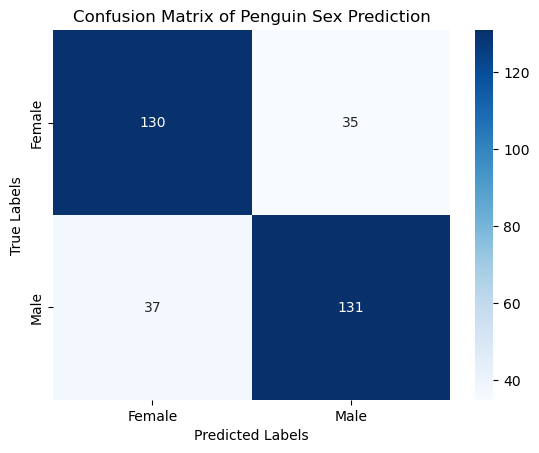

In [19]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Penguin Sex Prediction')
plt.show()

<Axes: >

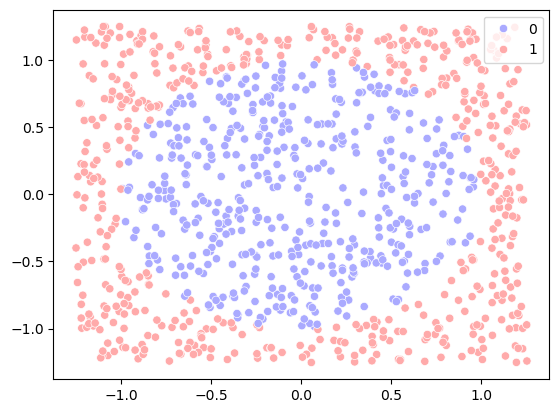

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay


# Step 1: Generate data
np.random.seed(0)
n_samples = 1000

r = 1
s = np.sqrt(2*np.pi) * r
x1 = np.random.uniform(-s/2, s/2, n_samples)
x2 = np.random.uniform(-s/2, s/2, n_samples)
X = np.vstack((x1, x2)).T
y = (x1**2 + x2**2 > r).astype(int)

# Step 2: Visualize the data
sns.scatterplot(x=x1, y=x2, hue=y, palette='bwr')


Accuracy: 0.442


<Figure size 640x480 with 0 Axes>

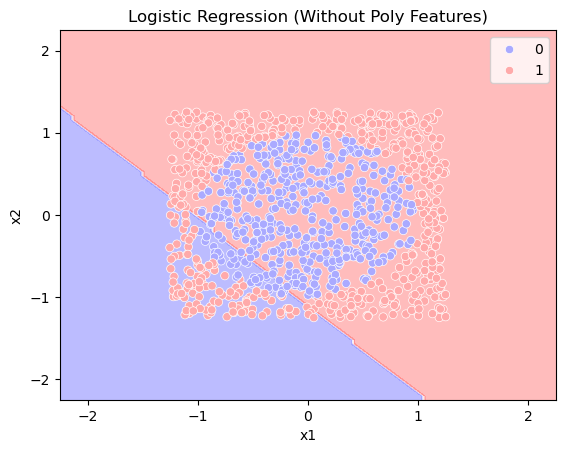

In [21]:
# Step 3: Logistic regression without polynomial features
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Step 4: Plot decision boundary (without polynomial features)
plt.figure()
disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", alpha=0.3, cmap='bwr')
sns.scatterplot(x=x1, y=x2, hue=y, palette='bwr')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression (Without Poly Features)")

acc = model.score(X, y)
print(f"Accuracy: {acc}")

In [22]:
X_poly = np.vstack((x1, x2, x1**2, x2**2)).T

model_poly = LogisticRegression()
model_poly.fit(X_poly, y)
y_poly_pred = model_poly.predict(X_poly)

acc = model_poly.score(X_poly, y)
print(f"Accuracy: {acc}")

model_poly.coef_

Accuracy: 0.994


array([[0.134259  , 0.13628499, 7.31227108, 7.34633247]])

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
df.dropna(inplace=True)

features = ['bill_length_mm', 'bill_depth_mm']

# Select features
X = df[features]
y = df['species']


# Initialize and train the logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Calculate the training and test accuracy
score = clf.score(X, y)
print(f"Accuracy: {score:.2f}")


# Predict on the test set
y_pred = clf.predict(X)


Accuracy: 0.96


Confusion Matrix:
 [[144   2   0]
 [  4  60   4]
 [  0   2 117]]


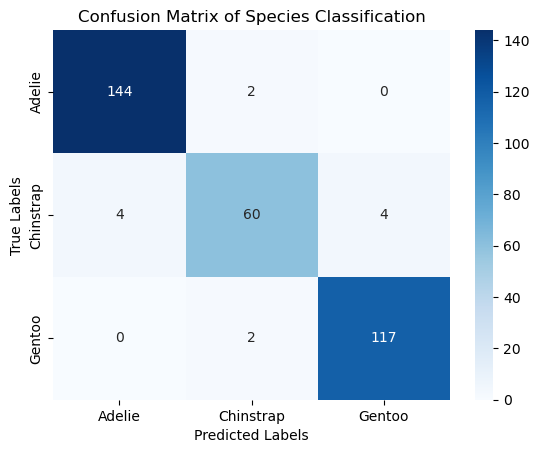

In [26]:

# Evaluate the model
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Species Classification')
plt.show()


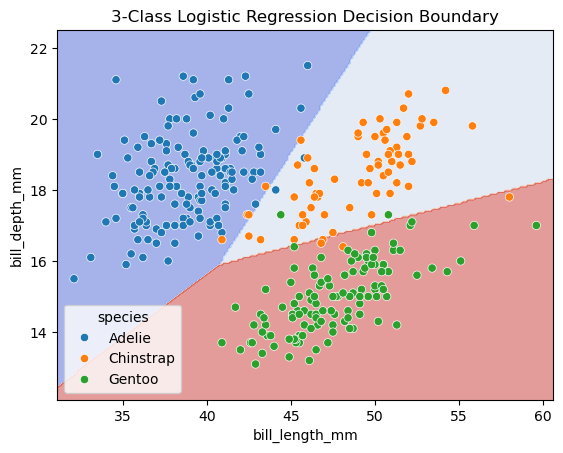

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots()
db_display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    grid_resolution=200,
    response_method="predict",  # Can be "predict_proba" for probability contours
    cmap='coolwarm',
    alpha=0.5,
    ax=ax
)

# Scatter plot of the data points
scatter = sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')

# Adding title and labels
ax.set_title('3-Class Logistic Regression Decision Boundary')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])

# Show plot
plt.show()
